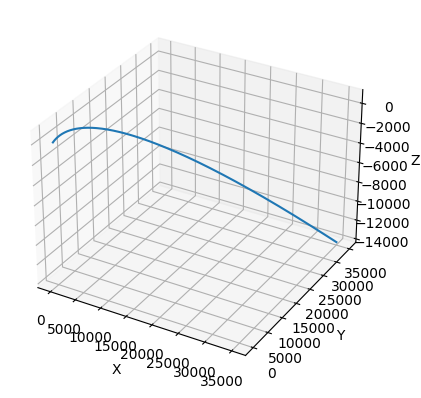

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
g = 9.81  # Acceleration due to gravity (m/s^2)
x0, y0, z0 = 0, 0, 0  # Initial position (m)
vx0, vy0, vz0 = 100, 100, 100  # Initial velocity (m/s)
m = 1000  # Mass of the missile (kg)
Tx, Ty, Tz = 5000, 5000, 5000  # Thrust force components (N)

# Motion function
def motion(t, state):
    x, y, z, vx, vy, vz = state
    ax = Tx / m
    ay = Ty / m
    az = Tz / m - g
    return [vx, vy, vz, ax, ay, az]

# Event function to stop integration
def hit_target(t, state):
    z = state[2]
    target_altitude = 2000  # Set your target altitude here
    return z - target_altitude

# Stop the integration when the event is triggered
hit_target.terminal = True
hit_target.direction = 1  # Only stop when z is increasing and reaches target

# Time span and initial state
t_span = (0, 100)  # Time interval
initial_state = [x0, y0, z0, vx0, vy0, vz0]

# Solve ODE
sol = solve_ivp(motion, t_span, initial_state, method='RK45', t_eval=np.linspace(0, 100, 500), events=hit_target)

# Extract results
x, y, z = sol.y[0], sol.y[1], sol.y[2]

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Make the plot interactive
plt.ion()
plt.show()

# Rotate the plot with the mouse
